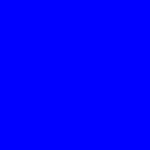

In [10]:
import imageio
from image_utils import display_image, image_gray_to_image_cubes_color
from cube import Cube  # Substitua pelo import correto do seu módulo Cube
import numpy as np
from typing import List

def cube_to_animation(target_cube, moves, filename="cube_moves", fixedFace=None):
    cube = Cube(np.zeros((3, 3, 3)), move_history=["x"], fixedFace=fixedFace)
    frames = []
    initial_image = image_gray_to_image_cubes_color(cube.image(150))
    frames.append(initial_image)

    for move in moves:
        cube.execute([move])
        img = image_gray_to_image_cubes_color(cube.image(150))
        frames.append(img)

    frames = [imageio.imread(frame) if not isinstance(frame, np.ndarray) else frame for frame in frames]
    imageio.mimsave('images/' + filename + '.gif', frames, duration=0.5, loop=0)

cube_to_animation(np.zeros((3,3,3)), ["x", "y", "z"], "cube_moves")


from IPython.display import display, Image
with open('images/cube_moves.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))


In [21]:
import ga 
import cube
import numpy as np

cti = ga.cubesToImage(n_cubes_x=10)
args = {
    "population_size": 500,
    "mutation_rate": 0.9,
    "crossover_rate": 0.3,
    "max_generations": 1000,
    "parent_pool_size": 10,
    "parents_number":  4
}

# display(cti.n_cubes_x**2)
gas = np.zeros((cti.n_cubes_x, cti.n_cubes_x), dtype=object)
cubes_and_moves = np.zeros((cti.n_cubes_x, cti.n_cubes_x), dtype=tuple)
for i in range(cti.n_cubes_x):
    for j in range(cti.n_cubes_x):
        gas[i][j] = cube.cube_GA(cti.target_cubes[i][j], **args)
        gas[i][j].run()
        print(gas[i][j].generation, gas[i][j].get_best().fitness)



0 0.0
1000 0.0880039331366765
1000 0.05211406096361849
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1000 0.024090462143559487
1000 0.07325467059980334
1000 0.05457227138643068
1000 0.014257620452310717
1000 0.04031465093411996
1000 0.063913470993117
1000 0.08751229105211406
1000 0.061455260570304815
0 0.0
0 0.0
1000 0.024090462143559487
1000 0.0471976401179941
1000 0.08505408062930186
1000 0.049164208456243856
1000 0.035398230088495575
1000 0.0599803343166175
1000 0.04768928220255654
1000 0.035398230088495575
0 0.0
0 0.0
1000 0.061946902654867256
138 0.0
1000 0.06637168141592921
1000 0.07030481809242871
1000 0.026057030481809244
1000 0.06342182890855458
1000 0.06588003933136677
1000 0.014257620452310717
0 0.0
0 0.0
1000 0.04768928220255654
1000 0.026057030481809244
1000 0.035889872173058016
1000 0.024090462143559487
241 0.0
1000 0.035398230088495575
0 0.0
0 0.0
0 0.0
0 0.0
1000 0.035398230088495575
1000 0.011799410029498525
0 0.0
1000 0.023107177974434612
1000 0.023107177974434612
1

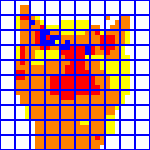

In [25]:
import numpy as np
final_cubes = np.zeros((cti.n_cubes_x, cti.n_cubes_x, 3, 3), dtype=np.uint8)

from image_utils import *
for i in range(cti.n_cubes_x):
    for j in range(cti.n_cubes_x):
        final_cubes[i][j] = gas[i][j].get_best().image()


display_image(image_gray_to_image_cubes_color(cubes_to_image(final_cubes, 1, 5, 0)))



# display(final_cubes[0][0].shape)
# from image_utils import cubes_to_image, display_image
# cubes_to_image(final_cubes, 1, 1, 150)
# display_image(cubes_to_image(final_cubes, 1, 3, 150))

In [ ]:
cti.cube_to